# Model comparison

In [1]:
# Imports...

import getpass
import h5py
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import numpy as np
import pandas as pd
import pickle

from tqdm import tqdm

# Size of plots
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
# Change presentation settings

%matplotlib inline

matplotlib.rcParams["figure.figsize"] = (8.0, 5.0)
matplotlib.rcParams["xtick.labelsize"] = 12
matplotlib.rcParams["ytick.labelsize"] = 12
matplotlib.rcParams["axes.spines.left"] = True
matplotlib.rcParams["axes.spines.bottom"] = True
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False
matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["legend.fontsize"] = 14
matplotlib.rcParams["axes.titlesize"] = 14

color_palette = {"Indigo": {
                    50: "#E8EAF6",
                    100: "#C5CAE9",
                    200: "#9FA8DA",
                    300: "#7986CB",
                    400: "#5C6BC0",
                    500: "#3F51B5",
                    600: "#3949AB",
                    700: "#303F9F",
                    800: "#283593",
                    900: "#1A237E"},
                 "Teal": {      
                    50: "#E0F2F1",
                    100: "#B2DFDB",
                    200: "#80CBC4",
                    300: "#4DB6AC",
                    400: "#26A69A",
                    500: "#009688",
                    600: "#00897B",
                    700: "#00796B",
                    800: "#00695C",
                    900: "#004D40"}
                }

line_styles = [(0, ()), (0, (1, 3)), (0, (3, 2))]

In [3]:
# Make ROC_curve

from sklearn.metrics import auc, roc_curve, roc_auc_score                          

def get_roc_curve(label, scores, names, colors, fold_no):
    """Generates ROC Curves for a given array"""
    fig, ax = plt.subplots()
    
    for i in range(len(scores)):
        fpr, tpr, thresholds = roc_curve(label, scores[i])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr,
                 tpr,
                 linewidth=3,
                 color=colors[i],
                 linestyle=line_styles[0],
                 label=("%s AUC: %s" % (names[i], roc_auc)))
        
    plt.legend(frameon=False)
    plt.ylabel("Sensitivity (TPR)")
    plt.xlabel("Fall-out (TNR)")
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.title(fold_no)
    plt.show();

In [4]:
files_dir = './model_comp_train_files/'

ae_scores = pickle.load(open(files_dir + "ae_scores.p", "rb"))
ms_scores = pickle.load(open(files_dir + "ms_scores.p", "rb"))
rf_scores = pickle.load(open(files_dir + "rf_scores.p", "rb"))
true_labels = pickle.load(open(files_dir + "true_labels.p", "rb"))
inliers = pickle.load(open(files_dir + "inliers.p", "rb"))
outliers = pickle.load(open(files_dir + "outliers.p", "rb"))

In [5]:
names = ["Autoencoder", "Mean square", "Random forest"]
colors = [color_palette["Teal"][400], color_palette["Indigo"][100], color_palette["Indigo"][700]]

Good lumis: 14738
Bad lumis: 142
Ratio of bad lumis: 0.00954301075269


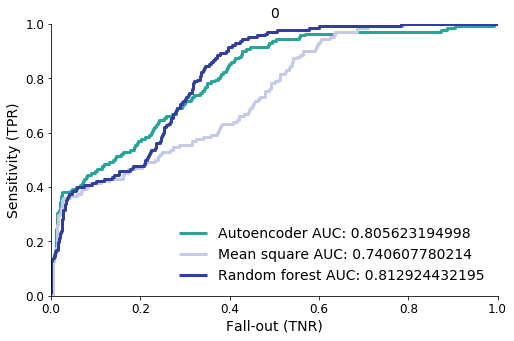

Good lumis: 14875
Bad lumis: 5
Ratio of bad lumis: 0.000336021505376


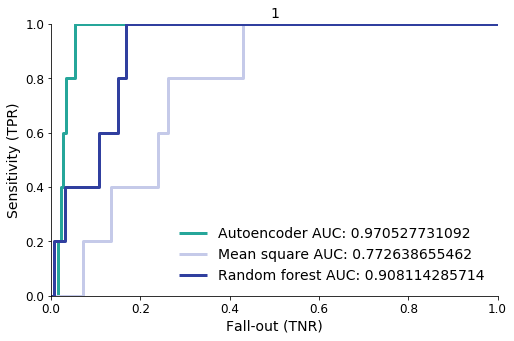

Good lumis: 14818
Bad lumis: 62
Ratio of bad lumis: 0.00416666666667


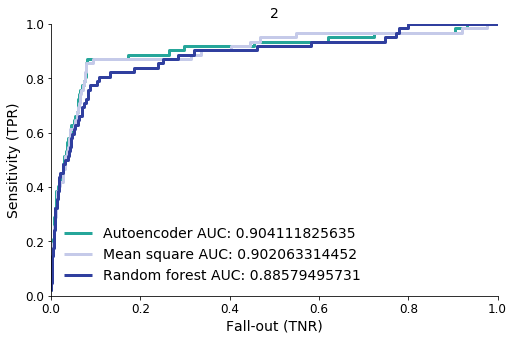

Good lumis: 14785
Bad lumis: 95
Ratio of bad lumis: 0.00638440860215


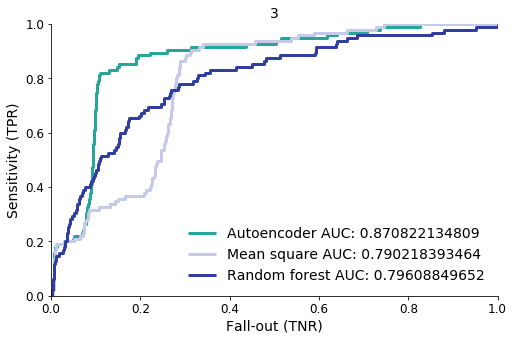

Good lumis: 14798
Bad lumis: 82
Ratio of bad lumis: 0.00551075268817


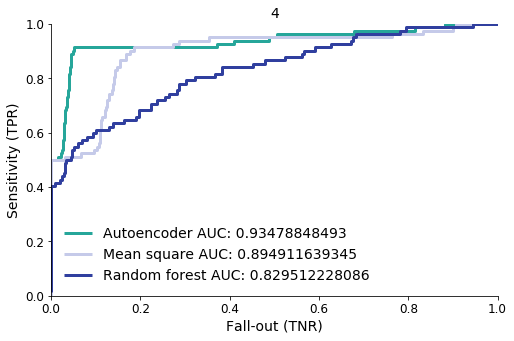

Good lumis: 14818
Bad lumis: 62
Ratio of bad lumis: 0.00416666666667


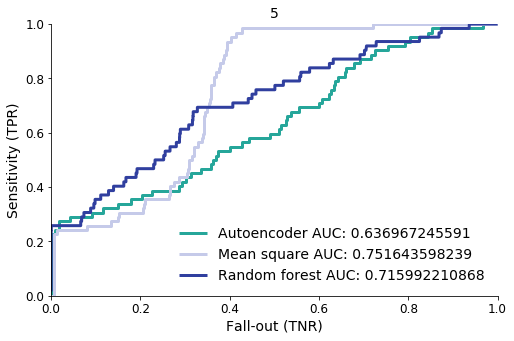

Good lumis: 14765
Bad lumis: 115
Ratio of bad lumis: 0.00772849462366


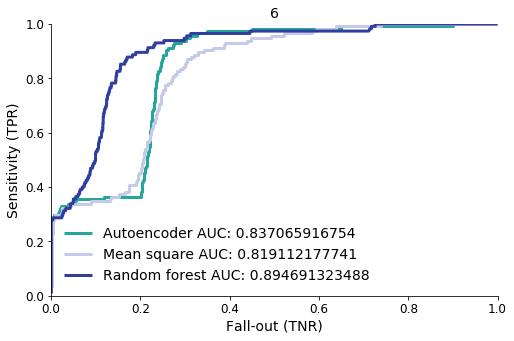

Good lumis: 13696
Bad lumis: 1184
Ratio of bad lumis: 0.0795698924731


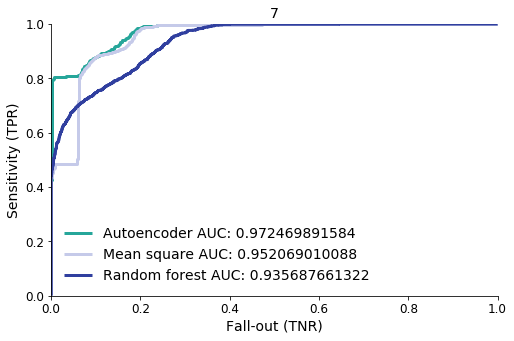

Good lumis: 14850
Bad lumis: 30
Ratio of bad lumis: 0.00201612903226


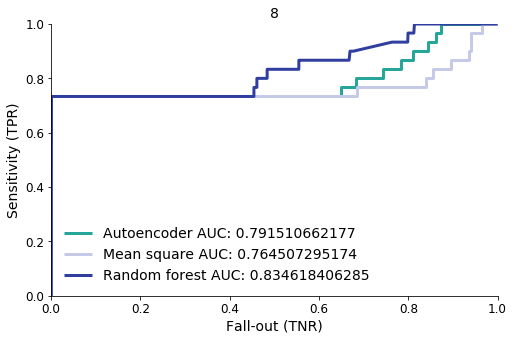

Good lumis: 14833
Bad lumis: 47
Ratio of bad lumis: 0.00315860215054


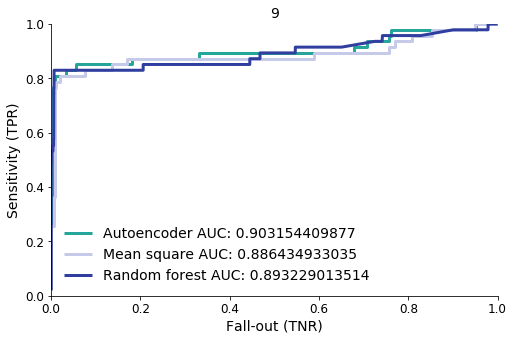

Mean AE score: 0.862704149745
Mean MS score: 0.827420679721
Mean RF score: 0.85066530153


In [6]:
ae_roc_auc = []
ms_roc_auc = []
rf_roc_auc = []
for i in range(10):
    print("Good lumis:", inliers[i])
    print("Bad lumis:", outliers[i])
    print("Ratio of bad lumis:", outliers[i]/len(true_labels[i]))
    ae_roc_auc.append(roc_auc_score(true_labels[i], ae_scores[i]))
    ms_roc_auc.append(roc_auc_score(true_labels[i], ms_scores[i]))
    rf_roc_auc.append(roc_auc_score(true_labels[i], rf_scores[i]))
    get_roc_curve(true_labels[i], [ae_scores[i], ms_scores[i], rf_scores[i]], names, colors, i)
print("Mean AE score:", np.mean(ae_roc_auc))
print("Mean MS score:", np.mean(ms_roc_auc))
print("Mean RF score:", np.mean(rf_roc_auc))